# Introduction

For a marketing campaign, the companies are interested in seeing how much of the success could be attributed to the ads. With that in mind, an A/B test is done where the experimental group (the majority of people) will be exposed to ads and a small portion of people (the control group) would instead see a Public Service Announcement (PSA) or nothing in the exact size and place the ad would normally be. 

We analyze the groups and find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant. 

**Data Dictionary**

- **index**: Row Index  
- **User ID**: User ID (unique)  
- **Test group**: If 'ad', the person saw the advertisement; if 'PSA', they only saw the public service announcement.  
- **converted**: If a person bought the product, then True; otherwise, False  
- **total ads**: Amount of ads seen by a person if converted= True; PSA seen by a person if converted = False  
- **most ads day**: Day the person saw the most ads  
- **most ads hour**: Hour of the day the person saw the most ads  


## Exploratory Data Analysis

In [153]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [154]:
#Reading the data

df = pd.read_csv('marketing_AB.csv')

#Checking the first five observations

df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


- **Categorical Variables:** Test group, converted, most ads day and most ads hour
- **Numerical Variable:** Total Ads

In [155]:
#Checking for duplicate user id as it's the unique identifier

df.duplicated(subset = 'user id').sum()

0

There were no duplicate user ids. It indicates that the ids are all unique. 

In [156]:
#Dropping irrelevant columns - Unnamed: 0 and user id as uder_id alone is not a predictor of anything

df.drop(['Unnamed: 0', 'user id'], axis = 1, inplace = True)

In [157]:
#Creating a subset of the dataframe df with just the categorical variables

df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]

#Checking the number of unique values in each column 

df_cat.nunique()


test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [158]:
#Extracting the names of the categories in each column

for i in df_cat.columns:
    print (i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Categorical Univariate Analysis

Text(0.5, 1.0, 'Pie Chart- test group')

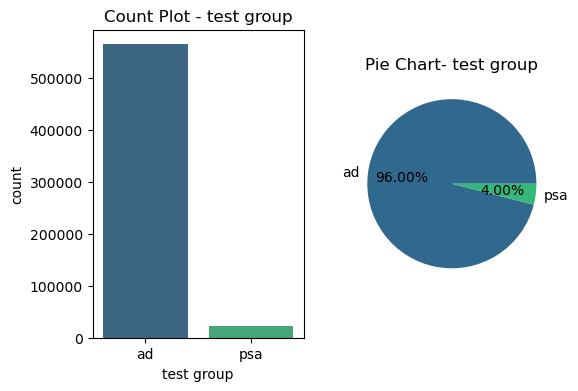

In [159]:
#Visualizing the variable 'test groups': Checking for occurrences/counts

variable = 'test group'
plt.figure(figsize = (6,4))

#Creating a Count plot

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, palette= 'viridis')
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counting the frequency of each unique value in the category
colors = sns.color_palette('viridis', len(counts))
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors=colors)
plt.title(f'Pie Chart- {variable}')


The ads and PSA were visible to 96% and 4% of the visitors respectively.

Text(0.5, 1.0, 'Pie Chart- converted')

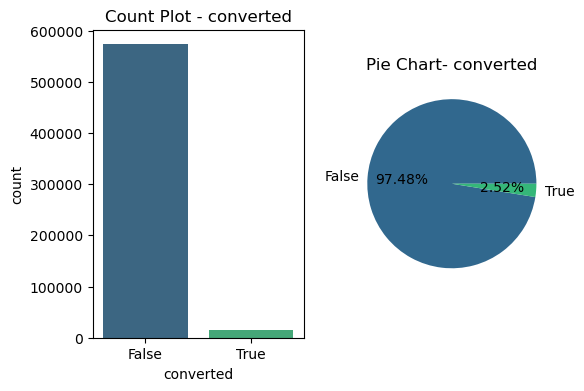

In [160]:
#Visualizing the variable 'test groups' 

variable = 'converted'

plt.figure(figsize = (6,4))

#Creating a Count plot

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, palette= 'viridis')
plt.title(f'Count Plot - {variable}')

#Creating a pie chart

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counting the frequency of each unique value in the category
colors = sns.color_palette('viridis', len(counts))
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors=colors)
plt.title(f'Pie Chart- {variable}')



This is the objective column for our analysis as it captures the conversions. 2.52% of the visitors bought the product while 97.48% did not. 

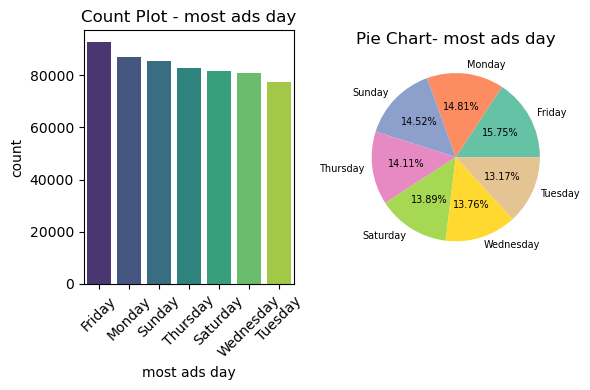

In [161]:
#Visualizing the variable 'most ads day'

variable = 'most ads day'

plt.figure(figsize = (6,4))

#Creating a Count plot

plt.subplot(1,2,1)
sns.countplot(x = variable, data = df_cat, order = df_cat['most ads day'].value_counts().index, palette= 'viridis')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 45)

#Creating a pie chart

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts() #counting the frequency of each unique value in the category
colors = sns.color_palette('Set2', len(counts))
plt.pie(counts, labels = counts.index, autopct = '%0.2f%%', colors=colors, textprops = {'fontsize':7})
plt.title(f'Pie Chart- {variable}')

plt.tight_layout()

Most ads were viewed on Friday as depicted by both the count plot and pie chart (15.75%).

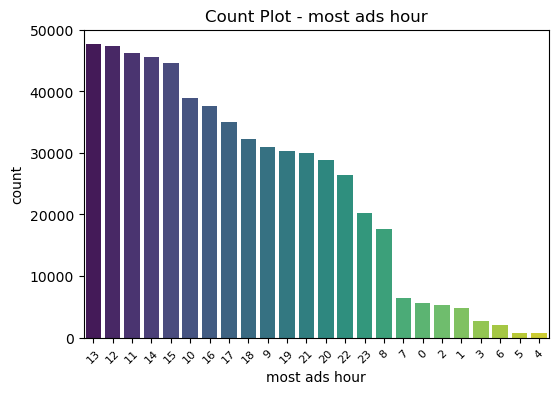

In [162]:
#Visualizing the variable 'most ads hour'

variable = 'most ads hour'

plt.figure(figsize = (6,4))

#Creating a Count plot
sns.countplot(x = variable, data = df_cat, order = df_cat['most ads hour'].value_counts().index, palette= 'viridis')
plt.title(f'Count Plot - {variable}')
plt.xticks(rotation = 45, fontsize = 8)
plt.show()


Most of the ads were viewed at 13:00 hours (1 pm).

### Numerical Univariate Analysis

In [163]:
#Checking the descriptive statistics of the 'total ads' variable

df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

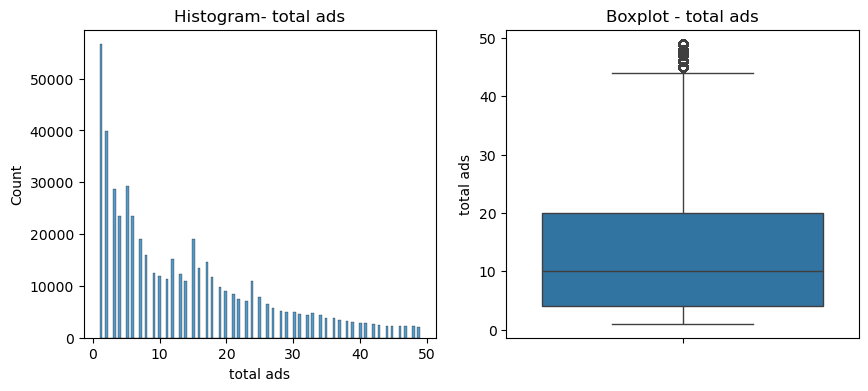

In [164]:
#Visualizing the variable 'total ads'

variable = 'total ads'
plt.figure(figsize=(10,4))

#Creating a histogram

plt.subplot(1,2,1)
sns.histplot(x = variable, data = df[df['total ads'] <50])
plt.title(f'Histogram- {variable}')

#Creating a boxplot with the values closer to the 75th percentile 

plt.subplot(1,2,2)
sns.boxplot(y = variable, data = df[df['total ads'] <50])
plt.title(f'Boxplot - {variable}')

plt.show()

The median number of ads, as indicated by the box plot, is 10. 

### Bivariate Analysis

Analysing the variables with respect to the target variable - 'converted' to assess the conversions

In [165]:
#Analysing test groups w.r.t converted 

ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group 

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


People who saw ads had 2.55% conversion while people who saw psa had 1.78% conversion. 

In [166]:
ct_conversion_day = pd.crosstab(df['most ads day'], df ['converted'], normalize = 'index').sort_values(by = True, ascending = False)
ct_conversion_day

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


Most of the conversions happened on Monday (3.28%).  

In [167]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize = 'index').sort_values(by = True, ascending = False)
ct_conversion_hour

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


Most of the people who viewed the ad at 4 pm (16:00 hours) converted. 

<Axes: xlabel='converted', ylabel='total ads'>

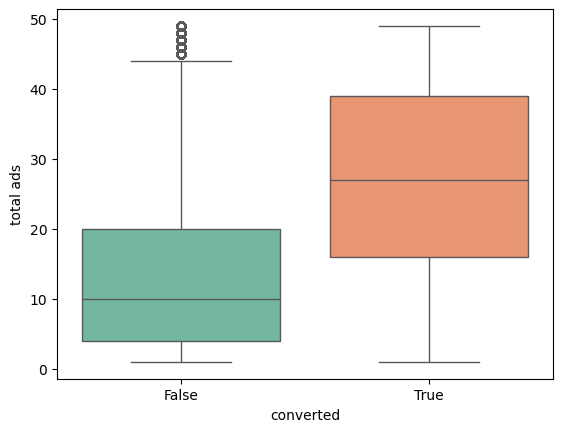

In [168]:
#Analysis of 'converted' vs 'total ads'

sns.boxplot(x = 'converted', y = 'total ads', data = df[df['total ads']<50], palette = 'Set2')

Most of the people who converted saw 25 ads while people who did not convert saw around 10 ads. 

### Statistical Analysis

**Test of Statitical Significance for Categorical Variables**
 
 **Chi-squared test for categorical variables**

In [169]:
from scipy.stats import chi2_contingency
alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        
        #Creating a contingency table to summarize the relationship between two or more categorical variables
        #Itdisplays the frequency  (or count) of obs for each combination of categories from the variables
        
        contingency_table = pd.crosstab(df[variable], df['converted']) #2D array
        
        #Perform chi-squared test for independence
        
        #It is used to determine if there is a significant association between two categorical variables
        
        
        chi2, p,_,_ = chi2_contingency(contingency_table) #degree of freedom, expected frequency
        
        #chi2 statistic: how much the obs. freq differ from the exp.freq
        #p-value: whether the obs. difference is statistically significant
        #if <0.05, indicates that the variables are likely not independent and there is an association between them
        
        print(f'\nChi-squared test for {variable} vs converted: ')
        print(f'Chi-squared value: {chi2}')
        print(f'p-value: {p}')
        
        #Checking for significance: 
        
        if p < alpha: 
            print(f'The difference in conversion rates across {variable} is statistically significant')
        else:
            print(f'There is no significant difference in converion rates across {variable}')


Chi-squared test for test group vs converted: 
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390078e-13
The difference in conversion rates across test group is statistically significant

Chi-squared test for most ads day vs converted: 
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant

Chi-squared test for most ads hour vs converted: 
Chi-squared value: 430.76869230822086
p-value: 8.027629823696774e-77
The difference in conversion rates across most ads hour is statistically significant


**Interpretation**:

- The conversion rate depends on the test group(people who were shown the ads had a higher conversion).
- It also depends on the days when the ads are shown (ads shown on Monday performed better).
- It depends on the hour of the day when the ads were shown (ads shown at 1 pm had higher conversion).

**Testing Statistical Significance for Numerical Variable**

In [170]:
#Checking for assumptions: Normality and Equality of Variances 

#Normality Assumption

from scipy.stats import shapiro, levene

#Levene test - Checks the equality of variance between the two subsets

_, levene_p_value = levene(df[df['converted']] ['total ads'], df[~df['converted']]['total ads'])

#Shapiro-Wilk Test: Tests for the normality of distribution in each group

_, shapiro_p_value_true = shapiro(df[df['converted']== True]['total ads'])

_, shapiro_p_value_false = shapiro(df[df['converted']== False]['total ads'])

print(f'Shapiro-Wilk p-value for True group: {shapiro_p_value_true}')
print(f'Shapiro-Wilk p-value for False group: {shapiro_p_value_false}')
print(f'Levene p-value: {levene_p_value}')

Shapiro-Wilk p-value for True group: 1.638680987007771e-98
Shapiro-Wilk p-value for False group: 9.883049430735801e-204
Levene p-value: 0.0


The results indicate a clear violation of the assumptions of normality and equality of variance. As the assumptions were not met, we cannot perform a parametric test like 2 sample t-test to check for equality of means between the samples. Therefore, we perform a non-parametric test like a Mann-Whitney U test to check for the equality of the group medians. 

In [171]:
#Performing a Mann-Whitney U test
from scipy.stats import mannwhitneyu

_, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f'Mann-Whitney U-test p-value: {u_p_value}')

Mann-Whitney U-test p-value: 0.0


The median number of ads that people have seen makes a difference in the conversion as suggested by the boxplot where people who made a purchase were shown a median of 25 ads and people who did not were shown a median of 10 ads. 